In [1]:
# Cuaderno de notas de clase sobre la solución de ecuaciones de una variable
# Autor: Camilo Ramírez
# Fecha actualización: Febrero 2021

#%matplotlib notebook
%matplotlib inline

# Métodos para solucionar ecuaciones de una variable

## Método gráfico
Función para graficar funciones algegraicas

In [2]:
def graficar(f, x_i, x_f, num = 1000):
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')
    import numpy as np
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: gráfica de la función
    """
    x = np.linspace(x_i, x_f, num)
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(x, f(x))
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()
    return None

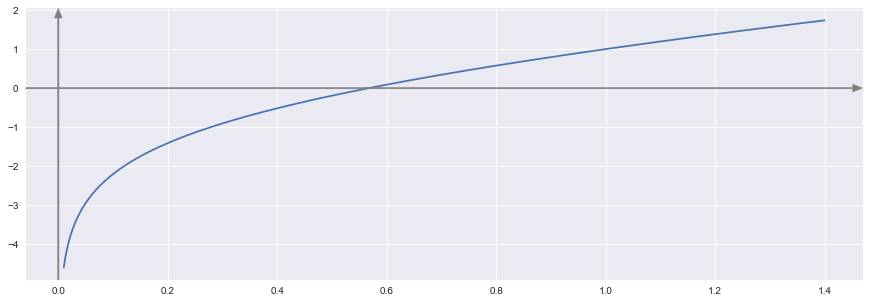

In [3]:
"""Ejemplo de cómo graficr una función"""
def f(x):
    import numpy as np
    return x + np.log(x)
graficar(f, 0.01, 1.4)

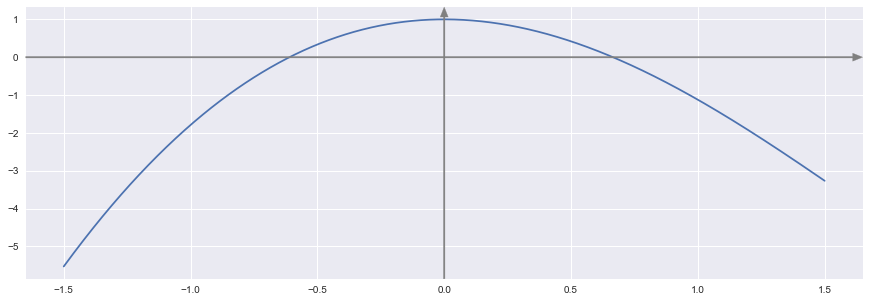

In [4]:
"""Ejemplo de cómo graficr una función"""
def g(x):
    import numpy as np
    from math import e
    return e**x - np.sin(x) - 3*x**2
graficar(g,-1.5,1.5)    

## Método de Bisección
Algoritmo del método de bisección para encontrar la soución de ecuaciones de una variable de la forma $f(x) = 0$

In [5]:
def metodo_biseccion(f, a, b, tol=10**-4, n=50):
    """
    Método de bisección
    :param f: Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0, previamente definida
    :param a: límite inferior
    :param b: límite superior
    :param tol: toleracia, criterio de parada
    :param n: número máximo de iteraciones, criterio de parada
    :return: solución exacta o aproximada, si tiene.
    """
    if f(a)*f(b) >= 0:  # el intevalo escogido no sirve
        print('El intervalo no funciona, f(a)={:.2f} y f(b)={:.2f}'.format(f(a),f(b)))
        return None
    
    e_abs = abs(b-a)
    i = 1
    while i <= n and e_abs > tol:
        c = (a + b)/2  # punto medio
        print('ite {:<2}: a_{:<2}={:.7f} , b_{:<2}={:.7f}, c_{:<2}={:.7f}'.format(i,i-1,a,i-1,b,i,c))
        if f(c)==0:  # solución exacta encontrada
            print('Solución encontrada x={:.7f}'. format(c))
            return c
        if f(a)*f(c)<0:  # escoger intervalo izquierdo
            b = c
            c_t = a
        else:  # escoger intervalo derecho
            a = c
            c_t = b
        e_abs = abs(c_t - c)  # error absoluto
        if e_abs < tol:  # criterio de parada
            print('Solución encontrada x= {:.7f}, iteraciones: {}'. format(c,i))
            return c
        i += 1
    print ('Solución no encontrada, iteraciones agotadas: {}'.format(i-1))
    return None

### Ejemplo
Encontrar las soluciones de la ecuación $f(x) = x + \ln(x) =0$

In [6]:
# Definición de la función
def f(x):
    import numpy as np
    return x + np.log(x)

In [7]:
# Método de bisección
metodo_biseccion(f, 0.2, 1.4, tol=10**-6, n=500)

ite 1 : a_0 =0.2000000 , b_0 =1.4000000, c_1 =0.8000000
ite 2 : a_1 =0.2000000 , b_1 =0.8000000, c_2 =0.5000000
ite 3 : a_2 =0.5000000 , b_2 =0.8000000, c_3 =0.6500000
ite 4 : a_3 =0.5000000 , b_3 =0.6500000, c_4 =0.5750000
ite 5 : a_4 =0.5000000 , b_4 =0.5750000, c_5 =0.5375000
ite 6 : a_5 =0.5375000 , b_5 =0.5750000, c_6 =0.5562500
ite 7 : a_6 =0.5562500 , b_6 =0.5750000, c_7 =0.5656250
ite 8 : a_7 =0.5656250 , b_7 =0.5750000, c_8 =0.5703125
ite 9 : a_8 =0.5656250 , b_8 =0.5703125, c_9 =0.5679687
ite 10: a_9 =0.5656250 , b_9 =0.5679687, c_10=0.5667969
ite 11: a_10=0.5667969 , b_10=0.5679687, c_11=0.5673828
ite 12: a_11=0.5667969 , b_11=0.5673828, c_12=0.5670898
ite 13: a_12=0.5670898 , b_12=0.5673828, c_13=0.5672363
ite 14: a_13=0.5670898 , b_13=0.5672363, c_14=0.5671631
ite 15: a_14=0.5670898 , b_14=0.5671631, c_15=0.5671265
ite 16: a_15=0.5671265 , b_15=0.5671631, c_16=0.5671448
ite 17: a_16=0.5671265 , b_16=0.5671448, c_17=0.5671356
ite 18: a_17=0.5671356 , b_17=0.5671448, c_18=0.

0.5671430587768553

### Ejemplo: Solución del ejercicio 5.3

In [8]:
# Definición de la función
def f(x):
    return -25 + 82*x - 90*x**2 + 44*x**3 - 8*x**4 + 0.7*x**5

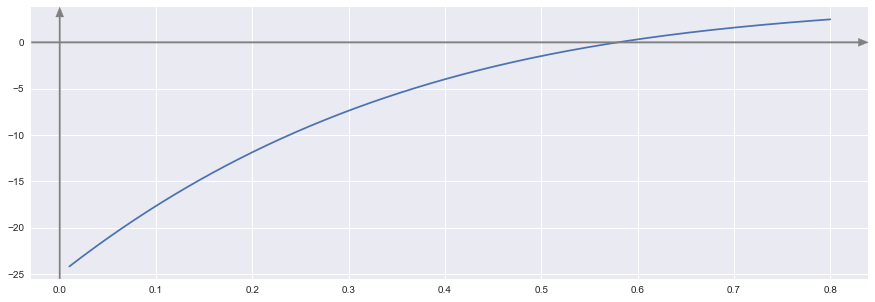

In [9]:
# Método de gráfico
graficar(f, 0.01, 0.8)

In [10]:
# Método de bisección
metodo_biseccion(f, 0.5, 1, tol=10**-5, n=500)

ite 1 : a_0 =0.5000000 , b_0 =1.0000000, c_1 =0.7500000
ite 2 : a_1 =0.5000000 , b_1 =0.7500000, c_2 =0.6250000
ite 3 : a_2 =0.5000000 , b_2 =0.6250000, c_3 =0.5625000
ite 4 : a_3 =0.5625000 , b_3 =0.6250000, c_4 =0.5937500
ite 5 : a_4 =0.5625000 , b_4 =0.5937500, c_5 =0.5781250
ite 6 : a_5 =0.5781250 , b_5 =0.5937500, c_6 =0.5859375
ite 7 : a_6 =0.5781250 , b_6 =0.5859375, c_7 =0.5820312
ite 8 : a_7 =0.5781250 , b_7 =0.5820312, c_8 =0.5800781
ite 9 : a_8 =0.5781250 , b_8 =0.5800781, c_9 =0.5791016
ite 10: a_9 =0.5791016 , b_9 =0.5800781, c_10=0.5795898
ite 11: a_10=0.5791016 , b_10=0.5795898, c_11=0.5793457
ite 12: a_11=0.5793457 , b_11=0.5795898, c_12=0.5794678
ite 13: a_12=0.5793457 , b_12=0.5794678, c_13=0.5794067
ite 14: a_13=0.5794067 , b_13=0.5794678, c_14=0.5794373
ite 15: a_14=0.5794067 , b_14=0.5794373, c_15=0.5794220
ite 16: a_15=0.5794067 , b_15=0.5794220, c_16=0.5794144
Solución encontrada x= 0.5794144, iteraciones: 16


0.5794143676757812

### Ejemplo: Solución ejercicio 5.15

In [11]:
# Definición de la función
def f1(H):
    import numpy as np
    v = 5 
    t =2.5
    L = 4 
    g = 9.81
    return np.sqrt(2*g*H)*np.tanh((np.sqrt(2*g*H)/(2*L))*t)-v

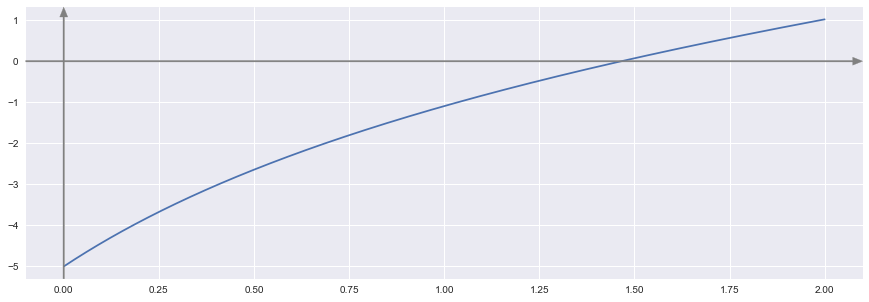

In [12]:
# Método de gráfico
graficar(f1,0,2)

In [13]:
# Método de bisección
metodo_biseccion(f1, 0, 2)

ite 1 : a_0 =0.0000000 , b_0 =2.0000000, c_1 =1.0000000
ite 2 : a_1 =1.0000000 , b_1 =2.0000000, c_2 =1.5000000
ite 3 : a_2 =1.0000000 , b_2 =1.5000000, c_3 =1.2500000
ite 4 : a_3 =1.2500000 , b_3 =1.5000000, c_4 =1.3750000
ite 5 : a_4 =1.3750000 , b_4 =1.5000000, c_5 =1.4375000
ite 6 : a_5 =1.4375000 , b_5 =1.5000000, c_6 =1.4687500
ite 7 : a_6 =1.4375000 , b_6 =1.4687500, c_7 =1.4531250
ite 8 : a_7 =1.4531250 , b_7 =1.4687500, c_8 =1.4609375
ite 9 : a_8 =1.4609375 , b_8 =1.4687500, c_9 =1.4648438
ite 10: a_9 =1.4648438 , b_9 =1.4687500, c_10=1.4667969
ite 11: a_10=1.4648438 , b_10=1.4667969, c_11=1.4658203
ite 12: a_11=1.4658203 , b_11=1.4667969, c_12=1.4663086
ite 13: a_12=1.4658203 , b_12=1.4663086, c_13=1.4660645
ite 14: a_13=1.4658203 , b_13=1.4660645, c_14=1.4659424
ite 15: a_14=1.4658203 , b_14=1.4659424, c_15=1.4658813
Solución encontrada x= 1.4658813, iteraciones: 15


1.46588134765625

### Ejemplo
Encontrar las soluciones de la ecuación:

$f(x)= 5x^3 - 5x^2 + 6x -2$

In [14]:
# Definición de la función
def f2(x):
    return 5*x**3 - 5*x**2 + 6*x - 2

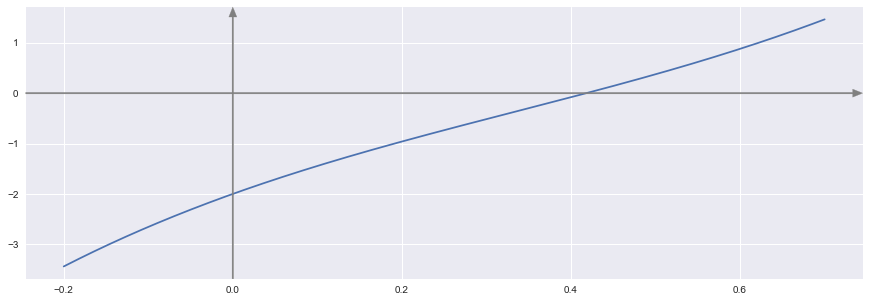

In [15]:
# Método de gráfico
graficar(f2, -0.2, 0.7)

In [16]:
# Método de bisección
metodo_biseccion(f2, -0.2, 0.6, 10**-4, 50)


ite 1 : a_0 =-0.2000000 , b_0 =0.6000000, c_1 =0.2000000
ite 2 : a_1 =0.2000000 , b_1 =0.6000000, c_2 =0.4000000
ite 3 : a_2 =0.4000000 , b_2 =0.6000000, c_3 =0.5000000
ite 4 : a_3 =0.4000000 , b_3 =0.5000000, c_4 =0.4500000
ite 5 : a_4 =0.4000000 , b_4 =0.4500000, c_5 =0.4250000
ite 6 : a_5 =0.4000000 , b_5 =0.4250000, c_6 =0.4125000
ite 7 : a_6 =0.4125000 , b_6 =0.4250000, c_7 =0.4187500
ite 8 : a_7 =0.4125000 , b_7 =0.4187500, c_8 =0.4156250
ite 9 : a_8 =0.4156250 , b_8 =0.4187500, c_9 =0.4171875
ite 10: a_9 =0.4171875 , b_9 =0.4187500, c_10=0.4179687
ite 11: a_10=0.4179687 , b_10=0.4187500, c_11=0.4183594
ite 12: a_11=0.4179687 , b_11=0.4183594, c_12=0.4181641
ite 13: a_12=0.4179687 , b_12=0.4181641, c_13=0.4180664
Solución encontrada x= 0.4180664, iteraciones: 13


0.4180664062499999

### Ejemplo: solución ejercicio 5.19
Con los datos dados se debe solucionar la ecuación:

$f(x)= x^3 - 3x^2 + \frac{16}{5}$

In [17]:
# Definición de la función
def f3(x):
    return x**3 - 3*x**2 + (16/5)

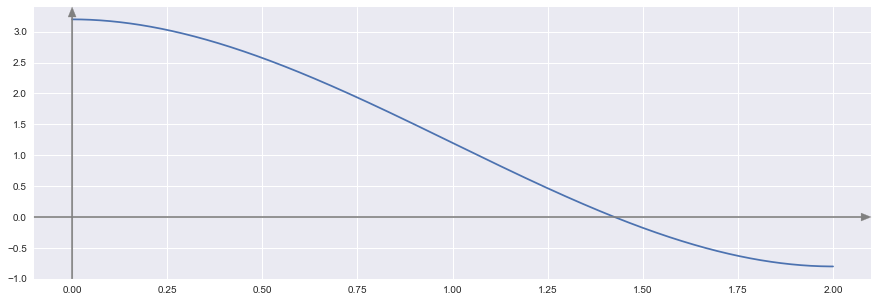

In [18]:
# Método de gráfico
graficar(f3, 0, 2)

In [19]:
# Método de bisección
metodo_biseccion(f3, 0, 2)

ite 1 : a_0 =0.0000000 , b_0 =2.0000000, c_1 =1.0000000
ite 2 : a_1 =1.0000000 , b_1 =2.0000000, c_2 =1.5000000
ite 3 : a_2 =1.0000000 , b_2 =1.5000000, c_3 =1.2500000
ite 4 : a_3 =1.2500000 , b_3 =1.5000000, c_4 =1.3750000
ite 5 : a_4 =1.3750000 , b_4 =1.5000000, c_5 =1.4375000
ite 6 : a_5 =1.3750000 , b_5 =1.4375000, c_6 =1.4062500
ite 7 : a_6 =1.4062500 , b_6 =1.4375000, c_7 =1.4218750
ite 8 : a_7 =1.4218750 , b_7 =1.4375000, c_8 =1.4296875
ite 9 : a_8 =1.4218750 , b_8 =1.4296875, c_9 =1.4257812
ite 10: a_9 =1.4218750 , b_9 =1.4257812, c_10=1.4238281
ite 11: a_10=1.4238281 , b_10=1.4257812, c_11=1.4248047
ite 12: a_11=1.4248047 , b_11=1.4257812, c_12=1.4252930
ite 13: a_12=1.4252930 , b_12=1.4257812, c_13=1.4255371
ite 14: a_13=1.4255371 , b_13=1.4257812, c_14=1.4256592
ite 15: a_14=1.4256592 , b_14=1.4257812, c_15=1.4257202
Solución encontrada x= 1.4257202, iteraciones: 15


1.42572021484375

Si se cambia la desidad de la esfera

In [20]:
def f4(x):
    from math import pi
    den = 700  # cambio en la densidad de la esfera
    return (pi*x**2)*(3-x)/3 - (4*pi/3)*(1-den/1000)

In [21]:
# Método de bisección

metodo_biseccion(f4, 0, 2)

ite 1 : a_0 =0.0000000 , b_0 =2.0000000, c_1 =1.0000000
ite 2 : a_1 =0.0000000 , b_1 =1.0000000, c_2 =0.5000000
ite 3 : a_2 =0.5000000 , b_2 =1.0000000, c_3 =0.7500000
ite 4 : a_3 =0.5000000 , b_3 =0.7500000, c_4 =0.6250000
ite 5 : a_4 =0.6250000 , b_4 =0.7500000, c_5 =0.6875000
ite 6 : a_5 =0.6875000 , b_5 =0.7500000, c_6 =0.7187500
ite 7 : a_6 =0.7187500 , b_6 =0.7500000, c_7 =0.7343750
ite 8 : a_7 =0.7187500 , b_7 =0.7343750, c_8 =0.7265625
ite 9 : a_8 =0.7187500 , b_8 =0.7265625, c_9 =0.7226562
ite 10: a_9 =0.7226562 , b_9 =0.7265625, c_10=0.7246094
ite 11: a_10=0.7246094 , b_10=0.7265625, c_11=0.7255859
ite 12: a_11=0.7255859 , b_11=0.7265625, c_12=0.7260742
ite 13: a_12=0.7260742 , b_12=0.7265625, c_13=0.7263184
ite 14: a_13=0.7263184 , b_13=0.7265625, c_14=0.7264404
ite 15: a_14=0.7264404 , b_14=0.7265625, c_15=0.7265015
Solución encontrada x= 0.7265015, iteraciones: 15


0.72650146484375

## Método _regula falsi_ (falsa posición)
Algoritmo del método regula falsi para encontrar la solución de ecuaciones de una variable de la forma $f(x) = 0$

In [22]:
def metodo_regulafalsi(f, a, b, tol=10**-4, n=50):
    """
    Método de regula falsi
    :param f: Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0, previamente definida
    :param a: límite inferior
    :param b: límite superior
    :param tol: toleracia, criterio de parada
    :param n: número máximo de iteraciones, criterio de parada
    :return: solución exacta o aproximada, si tiene.
    """
    if f(a)*f(b) >= 0:  # el intevalo escogido no sirve
        print('El intervalo no funciona, f(a)={:.2f} y f(b)={:.2f}'.format(f(a),f(b)))
        return None
    
    e_abs = abs(b-a)
    i = 1
    c = a - (f(a)*(b - a))/(f(b) - f(a))
    while i <= n and e_abs > tol:
        c_1 = c
        print('ite {:<2}: a_{:<2}={:.7f} , b_{:<2}={:.7f}, c_{:<2}={:.7f}'.format(i,i-1,a,i-1,b,i,c_1))
        
        if f(c_1)==0:  # solución exacta encontrada
            print('Solución encontrada x={:.7f}'. format(c_1))
            return c_1
        
        if f(a)*f(c)<0:  # escoger intervalo izquierdo
            b = c_1
        else:  # escoger intervalo derecho
            a = c_1
            
        c = a - (f(a)*(b - a))/(f(b) - f(a))
        
        e_abs = abs(c_1 - c)  # error absoluto
        
        if e_abs < tol:  # criterio de parada
            print('Solución encontrada x= {:.7f}, iteraciones: {}'. format(c,i))
            return c
        
        i += 1
    print ('Solución no encontrada, iteraciones agotadas: {}'.format(i-1))
    return None

### Ejemplo
Encontrar las soluciones de la ecuación $f(x) = x + \ln(x) =0$

In [23]:
# Definición de la función
def f(x):
    import numpy as np
    return x + np.log(x)

In [24]:
#método regula falsi
metodo_regulafalsi(f,0.2,1.4)

ite 1 : a_0 =0.2000000 , b_0 =1.4000000, c_1 =0.7376268
ite 2 : a_1 =0.2000000 , b_1 =0.7376268, c_2 =0.6112075
ite 3 : a_2 =0.2000000 , b_2 =0.6112075, c_3 =0.5792196
ite 4 : a_3 =0.2000000 , b_3 =0.5792196, c_4 =0.5705063
ite 5 : a_4 =0.2000000 , b_4 =0.5705063, c_5 =0.5680840
ite 6 : a_5 =0.2000000 , b_5 =0.5680840, c_6 =0.5674068
ite 7 : a_6 =0.2000000 , b_6 =0.5674068, c_7 =0.5672171
Solución encontrada x= 0.5671640, iteraciones: 7


0.5671639743436552

In [25]:
# Método de bisección
metodo_biseccion(f, 0.2, 1.4)

ite 1 : a_0 =0.2000000 , b_0 =1.4000000, c_1 =0.8000000
ite 2 : a_1 =0.2000000 , b_1 =0.8000000, c_2 =0.5000000
ite 3 : a_2 =0.5000000 , b_2 =0.8000000, c_3 =0.6500000
ite 4 : a_3 =0.5000000 , b_3 =0.6500000, c_4 =0.5750000
ite 5 : a_4 =0.5000000 , b_4 =0.5750000, c_5 =0.5375000
ite 6 : a_5 =0.5375000 , b_5 =0.5750000, c_6 =0.5562500
ite 7 : a_6 =0.5562500 , b_6 =0.5750000, c_7 =0.5656250
ite 8 : a_7 =0.5656250 , b_7 =0.5750000, c_8 =0.5703125
ite 9 : a_8 =0.5656250 , b_8 =0.5703125, c_9 =0.5679687
ite 10: a_9 =0.5656250 , b_9 =0.5679687, c_10=0.5667969
ite 11: a_10=0.5667969 , b_10=0.5679687, c_11=0.5673828
ite 12: a_11=0.5667969 , b_11=0.5673828, c_12=0.5670898
ite 13: a_12=0.5670898 , b_12=0.5673828, c_13=0.5672363
ite 14: a_13=0.5670898 , b_13=0.5672363, c_14=0.5671631
Solución encontrada x= 0.5671631, iteraciones: 14


0.5671630859374999

## Método _Newton - Raphson_
Algoritmo del método Newton-Raphson para encontrar la solución de ecuaciones de una variable de la forma $f(x) = 0$

In [26]:
def metodo_newton_raphson(f, df, p_0, tol=10**-6, n=50):
    print('ite {:<2}: p_{:<2}={:.7f}'.format(0,0,p_0))
    e_abs = 1
    i = 1
    while i <= n:
        
        if df(p_0) == 0:  # división por cero
            print('Solución no encontrara - df(x)=0')
            return None
        
        p_1 = p_0 - (f(p_0))/(df(p_0))  # fórmula método
        e_abs = abs(p_1-p_0)
        print('ite {:<2}: p_{:<2}={:.7f}, e_abs={:.7f}'.format(i,i,p_1,e_abs))
        
        if e_abs < tol: #criterio de parada
            print('Solución encotrada x={:.7f}, iteraciones: {}'.format(p_1,i))
            return p_1
        
        p_0 = p_1
        i += 1
    print('Solución no encontrada, iteraciones agotadas: {}'.format(i-1))
    return None

In [27]:
def f(x):
    return x**x - 100

def df(x):
    import numpy as np
    return x**x * (np.log(x) + 1)   

In [28]:
metodo_newton_raphson(f, df, 3.8, 10**-10)

ite 0 : p_0 =3.8000000
ite 1 : p_1 =3.6399819, e_abs=0.1600181
ite 2 : p_2 =3.5994071, e_abs=0.0405748
ite 3 : p_3 =3.5972904, e_abs=0.0021167
ite 4 : p_4 =3.5972850, e_abs=0.0000054
ite 5 : p_5 =3.5972850, e_abs=0.0000000
Solución encotrada x=3.5972850, iteraciones: 5


3.5972850235404175

In [29]:
metodo_biseccion(f,3,4,10**-10)

ite 1 : a_0 =3.0000000 , b_0 =4.0000000, c_1 =3.5000000
ite 2 : a_1 =3.5000000 , b_1 =4.0000000, c_2 =3.7500000
ite 3 : a_2 =3.5000000 , b_2 =3.7500000, c_3 =3.6250000
ite 4 : a_3 =3.5000000 , b_3 =3.6250000, c_4 =3.5625000
ite 5 : a_4 =3.5625000 , b_4 =3.6250000, c_5 =3.5937500
ite 6 : a_5 =3.5937500 , b_5 =3.6250000, c_6 =3.6093750
ite 7 : a_6 =3.5937500 , b_6 =3.6093750, c_7 =3.6015625
ite 8 : a_7 =3.5937500 , b_7 =3.6015625, c_8 =3.5976562
ite 9 : a_8 =3.5937500 , b_8 =3.5976562, c_9 =3.5957031
ite 10: a_9 =3.5957031 , b_9 =3.5976562, c_10=3.5966797
ite 11: a_10=3.5966797 , b_10=3.5976562, c_11=3.5971680
ite 12: a_11=3.5971680 , b_11=3.5976562, c_12=3.5974121
ite 13: a_12=3.5971680 , b_12=3.5974121, c_13=3.5972900
ite 14: a_13=3.5971680 , b_13=3.5972900, c_14=3.5972290
ite 15: a_14=3.5972290 , b_14=3.5972900, c_15=3.5972595
ite 16: a_15=3.5972595 , b_15=3.5972900, c_16=3.5972748
ite 17: a_16=3.5972748 , b_16=3.5972900, c_17=3.5972824
ite 18: a_17=3.5972824 , b_17=3.5972900, c_18=3.

3.597285023482982

In [30]:
metodo_regulafalsi(f,3,4,10**-10)

ite 1 : a_0 =3.0000000 , b_0 =4.0000000, c_1 =3.3187773
ite 2 : a_1 =3.3187773 , b_1 =4.0000000, c_2 =3.4749964
ite 3 : a_2 =3.4749964 , b_2 =4.0000000, c_3 =3.5454379
ite 4 : a_3 =3.5454379 , b_3 =4.0000000, c_4 =3.5756755
ite 5 : a_4 =3.5756755 , b_4 =4.0000000, c_5 =3.5883464
ite 6 : a_5 =3.5883464 , b_5 =4.0000000, c_6 =3.5935995
ite 7 : a_6 =3.5935995 , b_6 =4.0000000, c_7 =3.5957675
ite 8 : a_7 =3.5957675 , b_7 =4.0000000, c_8 =3.5966605
ite 9 : a_8 =3.5966605 , b_8 =4.0000000, c_9 =3.5970281
ite 10: a_9 =3.5970281 , b_9 =4.0000000, c_10=3.5971793
ite 11: a_10=3.5971793 , b_10=4.0000000, c_11=3.5972415
ite 12: a_11=3.5972415 , b_11=4.0000000, c_12=3.5972671
ite 13: a_12=3.5972671 , b_12=4.0000000, c_13=3.5972777
ite 14: a_13=3.5972777 , b_13=4.0000000, c_14=3.5972820
ite 15: a_14=3.5972820 , b_14=4.0000000, c_15=3.5972838
ite 16: a_15=3.5972838 , b_15=4.0000000, c_16=3.5972845
ite 17: a_16=3.5972845 , b_16=4.0000000, c_17=3.5972848
ite 18: a_17=3.5972848 , b_17=4.0000000, c_18=3.

3.59728502351117

In [31]:
metodo_newton_raphson(f, df, 1, 10**-10, 500)

ite 0 : p_0 =1.0000000
ite 1 : p_1 =100.0000000, e_abs=99.0000000
ite 2 : p_2 =99.8215933, e_abs=0.1784067
ite 3 : p_3 =99.6431297, e_abs=0.1784636
ite 4 : p_4 =99.4646091, e_abs=0.1785206
ite 5 : p_5 =99.2860314, e_abs=0.1785777
ite 6 : p_6 =99.1073963, e_abs=0.1786351
ite 7 : p_7 =98.9287038, e_abs=0.1786926
ite 8 : p_8 =98.7499536, e_abs=0.1787502
ite 9 : p_9 =98.5711456, e_abs=0.1788080
ite 10: p_10=98.3922796, e_abs=0.1788660
ite 11: p_11=98.2133555, e_abs=0.1789241
ite 12: p_12=98.0343731, e_abs=0.1789824
ite 13: p_13=97.8553323, e_abs=0.1790408
ite 14: p_14=97.6762329, e_abs=0.1790994
ite 15: p_15=97.4970746, e_abs=0.1791582
ite 16: p_16=97.3178575, e_abs=0.1792172
ite 17: p_17=97.1385812, e_abs=0.1792763
ite 18: p_18=96.9592456, e_abs=0.1793356
ite 19: p_19=96.7798506, e_abs=0.1793950
ite 20: p_20=96.6003959, e_abs=0.1794546
ite 21: p_21=96.4208815, e_abs=0.1795144
ite 22: p_22=96.2413071, e_abs=0.1795744
ite 23: p_23=96.0616726, e_abs=0.1796345
ite 24: p_24=95.8819778, e_abs=0

ite 392: p_392=22.4070669, e_abs=0.2427096
ite 393: p_393=22.1637210, e_abs=0.2433459
ite 394: p_394=21.9197267, e_abs=0.2439943
ite 395: p_395=21.6750716, e_abs=0.2446551
ite 396: p_396=21.4297428, e_abs=0.2453288
ite 397: p_397=21.1837270, e_abs=0.2460158
ite 398: p_398=20.9370104, e_abs=0.2467166
ite 399: p_399=20.6895787, e_abs=0.2474318
ite 400: p_400=20.4414169, e_abs=0.2481617
ite 401: p_401=20.1925098, e_abs=0.2489071
ite 402: p_402=19.9428414, e_abs=0.2496685
ite 403: p_403=19.6923950, e_abs=0.2504464
ite 404: p_404=19.4411534, e_abs=0.2512416
ite 405: p_405=19.1890986, e_abs=0.2520547
ite 406: p_406=18.9362121, e_abs=0.2528866
ite 407: p_407=18.6824743, e_abs=0.2537378
ite 408: p_408=18.4278649, e_abs=0.2546093
ite 409: p_409=18.1723629, e_abs=0.2555020
ite 410: p_410=17.9159462, e_abs=0.2564167
ite 411: p_411=17.6585918, e_abs=0.2573545
ite 412: p_412=17.4002754, e_abs=0.2583163
ite 413: p_413=17.1409720, e_abs=0.2593034
ite 414: p_414=16.8806551, e_abs=0.2603169
ite 415: p_

3.5972850235404175

### Ejemplo
Encontrar las soluciones de la ecuación $f(x) = x + \ln(x) =0$

In [32]:
# Definición de la función
def f(x):
    import numpy as np
    return x + np.log(x)

def df(x):
    import numpy as np
    return 1 + 1/x

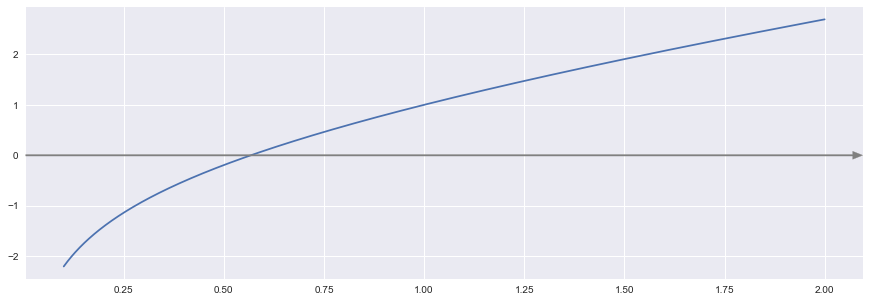

In [33]:
graficar(f,0.1,2)

In [34]:
metodo_newton_raphson(f, df, 0.5, tol=10**-15, n=500)

ite 0 : p_0 =0.5000000
ite 1 : p_1 =0.5643824, e_abs=0.0643824
ite 2 : p_2 =0.5671390, e_abs=0.0027566
ite 3 : p_3 =0.5671433, e_abs=0.0000043
ite 4 : p_4 =0.5671433, e_abs=0.0000000
ite 5 : p_5 =0.5671433, e_abs=0.0000000
Solución encotrada x=0.5671433, iteraciones: 5


0.5671432904097838

In [35]:
# Método de bisección
metodo_biseccion(f, 0.2, 1.4, tol=10**-15, n=500)

ite 1 : a_0 =0.2000000 , b_0 =1.4000000, c_1 =0.8000000
ite 2 : a_1 =0.2000000 , b_1 =0.8000000, c_2 =0.5000000
ite 3 : a_2 =0.5000000 , b_2 =0.8000000, c_3 =0.6500000
ite 4 : a_3 =0.5000000 , b_3 =0.6500000, c_4 =0.5750000
ite 5 : a_4 =0.5000000 , b_4 =0.5750000, c_5 =0.5375000
ite 6 : a_5 =0.5375000 , b_5 =0.5750000, c_6 =0.5562500
ite 7 : a_6 =0.5562500 , b_6 =0.5750000, c_7 =0.5656250
ite 8 : a_7 =0.5656250 , b_7 =0.5750000, c_8 =0.5703125
ite 9 : a_8 =0.5656250 , b_8 =0.5703125, c_9 =0.5679687
ite 10: a_9 =0.5656250 , b_9 =0.5679687, c_10=0.5667969
ite 11: a_10=0.5667969 , b_10=0.5679687, c_11=0.5673828
ite 12: a_11=0.5667969 , b_11=0.5673828, c_12=0.5670898
ite 13: a_12=0.5670898 , b_12=0.5673828, c_13=0.5672363
ite 14: a_13=0.5670898 , b_13=0.5672363, c_14=0.5671631
ite 15: a_14=0.5670898 , b_14=0.5671631, c_15=0.5671265
ite 16: a_15=0.5671265 , b_15=0.5671631, c_16=0.5671448
ite 17: a_16=0.5671265 , b_16=0.5671448, c_17=0.5671356
ite 18: a_17=0.5671356 , b_17=0.5671448, c_18=0.

0.5671432904097841

## Método de la secante
Algoritmo del método de la secante para encontrar la solución de ecuaciones de una variable de la forma $f(x) = 0$

In [36]:
def metodo_secante(f, p_0, p_1, tol=10**-4, n=50):
    """
    Método Newton Raphson
    :param f: Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0, previamente definida
    :param p_0: semilla (punto inicial)
    :param p_1: semilla (punto inicial)
    :param tol: toleracia, criterio de parada
    :param n: número máximo de iteraciones, criterio de parada
    :return: solución exacta o aproximada, si tiene.
    """
    e_abs = abs(p_1 - p_0)
    
    print('ite {:<2}: p_{:<2}={:.7f}'.format(0,0,p_0))
    print('ite {:<2}: p_{:<2}={:.7f}, e_abs={:.7f}'.format(1,1,p_1,e_abs))
    
    i = 2
    while i <= n:
        if f(p_1) == f(p_0): #división por cero
            print('Solución no encontrada (error en los valores iniciales)')
            return None
        
        p_2 = p_0 - (f(p_0)*(p_1 - p_0))/(f(p_1) - f(p_0))  # fórmula método secante
        e_abs = abs(p_2 - p_1)
        print('ite {:<2}: p_{:<2}={:.7f}, e_abs={:.7f}'.format(i,i,p_2,e_abs))
        
        if e_abs < tol:  # criterio de parada
            print('Solución encontrada x= {:.7f}, iteraciones: {}'. format(p_2,i))
            return p_2
        p_0 = p_1
        p_1 = p_2
        i += 1
    print('Solución no encontrada, iteraciones agotadas: {}'.format(i-1))
    return None       

In [37]:
# Definición de la función
def f(x):
    return x**x - 100

In [38]:
metodo_secante(f, 3, 3.2, 10**-15, 500)

ite 0 : p_0 =3.0000000
ite 1 : p_1 =3.2000000, e_abs=0.2000000
ite 2 : p_2 =4.0173918, e_abs=0.8173918
ite 3 : p_3 =3.4125856, e_abs=0.6048062
ite 4 : p_4 =3.5150966, e_abs=0.1025110
ite 5 : p_5 =3.6174156, e_abs=0.1023190
ite 6 : p_6 =3.5952542, e_abs=0.0221614
ite 7 : p_7 =3.5972363, e_abs=0.0019821
ite 8 : p_8 =3.5972851, e_abs=0.0000489
ite 9 : p_9 =3.5972850, e_abs=0.0000001
ite 10: p_10=3.5972850, e_abs=0.0000000
ite 11: p_11=3.5972850, e_abs=0.0000000
Solución encontrada x= 3.5972850, iteraciones: 11


3.5972850235404175

In [39]:
metodo_newton_raphson(f, df, 3.8, 10**-15, 500)

ite 0 : p_0 =3.8000000
ite 1 : p_1 =-43.4254615, e_abs=47.2254615
ite 2 : p_2 =58.9316137-0.0000000j, e_abs=102.3570751
ite 3 : p_3 =-209979238324285598044125817137183586480556589284841687485923430253797249059004131317962024340217655197696.0000000+8054644578450343523945889778368512.0000000j, e_abs=209979238324285598044125817137183586480556589284841687485923430253797249059004131317962024340217655197696.0000000
ite 4 : p_4 =-209979238324285598044125817137183586480556589284841687485923430253797249059004131317962024340217655197696.0000000+8054644578450343523945889778368512.0000000j, e_abs=0.0000000
Solución encotrada x=-209979238324285598044125817137183586480556589284841687485923430253797249059004131317962024340217655197696.0000000+8054644578450343523945889778368512.0000000j, iteraciones: 4


(-2.099792383242856e+104+8.054644578450344e+33j)

## Método del punto fijo
Algoritmo del método de punto fijo para encontrar la solución de ecuaciones de una variable de la forma $g(x) = x$

In [54]:
def metodo_puntofijo(g, p_0, tol=10**-4, n=50):
    """
    Método de punto fijo
    :param g: Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0, previamente definida
    :param p_0: semilla (punto inicial)
    :param tol: toleracia, criterio de parada
    :param n: número máximo de iteraciones, criterio de parada
    :return: solución exacta o aproximada, si tiene.
    """ 
    print('ite {:<2}: p_{:<2}={:.7f}'.format(0,0,p_0))
    i = 1
    while i <= n:
        try:
            p_1 = g(p_0)  #fórmula
        except OverflowError:
            print('Explosión !!!')
            return None
        e_abs = abs(p_1 - p_0)  # error absoluto
        print('ite {:<2}: p_{:<2}={:.7f}, e_abs={:.7f}'.format(i,i,p_1,e_abs))
        if e_abs < tol:  # criterio de parada
            print('Solución encontrada x={:.7f}, iteraciones: {}'.format(p_1,i))
            return p_1
        i += 1
        p_0 = p_1
    print('Solución no encontrada, iteraciones agotadas: {}'.format(i-1))
    return None
    

In [45]:
def g1(x):
    return x**3+4*x**2-10-x
def g2(x):
    return 10/(x**4 - 4*x)
def g3(x):
    return (10/(x+4))**(1/2)

In [57]:
metodo_puntofijo(g1, 1.3652)

ite 0 : p_0 =1.3652000
ite 1 : p_1 =-1.3656956, e_abs=2.7308956
ite 2 : p_2 =-3.7209987, e_abs=2.3553031
ite 3 : p_3 =-2.4159963, e_abs=1.3050024
ite 4 : p_4 =1.6618863, e_abs=4.0778826
ite 5 : p_5 =3.9754852, e_abs=2.3135989
ite 6 : p_6 =112.0729347, e_abs=108.0974494
ite 7 : p_7 =1457793.7625999, e_abs=1457681.6896652
ite 8 : p_8 =3098057362561719296.0000000, e_abs=3098057362560261632.0000000
ite 9 : p_9 =29735028852037177061616560656680035087875538714840006656.0000000, e_abs=29735028852037177061616560656680035087875538714840006656.0000000
ite 10: p_10=26290878170785865293200283329674464696389838776228054936598822682181670009026660904303923318679230157368312021872544687815386376191365007584497026017585366902606135296.0000000, e_abs=26290878170785865293200283329674464696389838776228054936598822682181670009026660904303923318679230157368312021872544687815386376191365007584497026017585366902606135296.0000000
Explosión !!!


In [56]:
metodo_puntofijo(g2, 1.3652)

ite 0 : p_0 =1.3652000
ite 1 : p_1 =-5.0323137, e_abs=6.3975137
ite 2 : p_2 =0.0151185, e_abs=5.0474322
ite 3 : p_3 =-165.3609969, e_abs=165.3761154
ite 4 : p_4 =0.0000000, e_abs=165.3609969
ite 5 : p_5 =-186927294.6266523, e_abs=186927294.6266523
ite 6 : p_6 =0.0000000, e_abs=186927294.6266523
ite 7 : p_7 =-305232582255568116242324886913024.0000000, e_abs=305232582255568116242324886913024.0000000
ite 8 : p_8 =0.0000000, e_abs=305232582255568116242324886913024.0000000
ite 9 : p_9 =-2170019177419029419884197951760783853197487235638325423011780264646564279301699145454552398915510965899057788671677140971202543616.0000000, e_abs=2170019177419029419884197951760783853197487235638325423011780264646564279301699145454552398915510965899057788671677140971202543616.0000000
Explosión !!!


In [55]:
metodo_puntofijo(g3, 1.1)

ite 0 : p_0 =1.1000000
ite 1 : p_1 =1.4002801, e_abs=0.3002801
ite 2 : p_2 =1.3607923, e_abs=0.0394877
ite 3 : p_3 =1.3657950, e_abs=0.0050026
ite 4 : p_4 =1.3651581, e_abs=0.0006368
ite 5 : p_5 =1.3652392, e_abs=0.0000810
Solución encontrada x=1.3652392, iteraciones: 5


1.3652391578493726

In [59]:
def g(x):
    return 2**(-x)
def f(x):
    return 2**(-x)-x
def df(x):
    import numpy as np
    return -2**(-x)*np.log(2)-1

In [61]:
metodo_puntofijo(g, 1.1,10**-15)

ite 0 : p_0 =1.1000000
ite 1 : p_1 =0.4665165, e_abs=0.6334835
ite 2 : p_2 =0.7237099, e_abs=0.2571935
ite 3 : p_3 =0.6055383, e_abs=0.1181717
ite 4 : p_4 =0.6572261, e_abs=0.0516878
ite 5 : p_5 =0.6340963, e_abs=0.0231298
ite 6 : p_6 =0.6443443, e_abs=0.0102480
ite 7 : p_7 =0.6397835, e_abs=0.0045608
ite 8 : p_8 =0.6418093, e_abs=0.0020258
ite 9 : p_9 =0.6409087, e_abs=0.0009006
ite 10: p_10=0.6413089, e_abs=0.0004002
ite 11: p_11=0.6411310, e_abs=0.0001779
ite 12: p_12=0.6412101, e_abs=0.0000790
ite 13: p_13=0.6411749, e_abs=0.0000351
ite 14: p_14=0.6411905, e_abs=0.0000156
ite 15: p_15=0.6411836, e_abs=0.0000069
ite 16: p_16=0.6411867, e_abs=0.0000031
ite 17: p_17=0.6411853, e_abs=0.0000014
ite 18: p_18=0.6411859, e_abs=0.0000006
ite 19: p_19=0.6411857, e_abs=0.0000003
ite 20: p_20=0.6411858, e_abs=0.0000001
ite 21: p_21=0.6411857, e_abs=0.0000001
ite 22: p_22=0.6411858, e_abs=0.0000000
ite 23: p_23=0.6411857, e_abs=0.0000000
ite 24: p_24=0.6411857, e_abs=0.0000000
ite 25: p_25=0.64

0.6411857445049857

In [62]:
metodo_newton_raphson(f, df, 1.1,10**-15)

ite 0 : p_0 =1.1000000
ite 1 : p_1 =0.6213084, e_abs=0.4786916
ite 2 : p_2 =0.6411434, e_abs=0.0198350
ite 3 : p_3 =0.6411857, e_abs=0.0000423
ite 4 : p_4 =0.6411857, e_abs=0.0000000
ite 5 : p_5 =0.6411857, e_abs=0.0000000
Solución encotrada x=0.6411857, iteraciones: 5


0.641185744504986

In [71]:
metodo_biseccion(f, 0, 1, 10**-15, 500)

ite 1 : a_0 =0.0000000 , b_0 =1.0000000, c_1 =0.5000000
ite 2 : a_1 =0.5000000 , b_1 =1.0000000, c_2 =0.7500000
ite 3 : a_2 =0.5000000 , b_2 =0.7500000, c_3 =0.6250000
ite 4 : a_3 =0.6250000 , b_3 =0.7500000, c_4 =0.6875000
ite 5 : a_4 =0.6250000 , b_4 =0.6875000, c_5 =0.6562500
ite 6 : a_5 =0.6250000 , b_5 =0.6562500, c_6 =0.6406250
ite 7 : a_6 =0.6406250 , b_6 =0.6562500, c_7 =0.6484375
ite 8 : a_7 =0.6406250 , b_7 =0.6484375, c_8 =0.6445312
ite 9 : a_8 =0.6406250 , b_8 =0.6445312, c_9 =0.6425781
ite 10: a_9 =0.6406250 , b_9 =0.6425781, c_10=0.6416016
ite 11: a_10=0.6406250 , b_10=0.6416016, c_11=0.6411133
ite 12: a_11=0.6411133 , b_11=0.6416016, c_12=0.6413574
ite 13: a_12=0.6411133 , b_12=0.6413574, c_13=0.6412354
ite 14: a_13=0.6411133 , b_13=0.6412354, c_14=0.6411743
ite 15: a_14=0.6411743 , b_14=0.6412354, c_15=0.6412048
ite 16: a_15=0.6411743 , b_15=0.6412048, c_16=0.6411896
ite 17: a_16=0.6411743 , b_16=0.6411896, c_17=0.6411819
ite 18: a_17=0.6411819 , b_17=0.6411896, c_18=0.

0.6411857445049867

In [73]:
metodo_regulafalsi(f, 0, 1, 10**-15, 500)

ite 1 : a_0 =0.0000000 , b_0 =1.0000000, c_1 =0.6666667
ite 2 : a_1 =0.0000000 , b_1 =0.6666667, c_2 =0.6430623
ite 3 : a_2 =0.0000000 , b_2 =0.6430623, c_3 =0.6413243
ite 4 : a_3 =0.0000000 , b_3 =0.6413243, c_4 =0.6411960
ite 5 : a_4 =0.0000000 , b_4 =0.6411960, c_5 =0.6411865
ite 6 : a_5 =0.0000000 , b_5 =0.6411865, c_6 =0.6411858
ite 7 : a_6 =0.0000000 , b_6 =0.6411858, c_7 =0.6411857
ite 8 : a_7 =0.0000000 , b_7 =0.6411857, c_8 =0.6411857
ite 9 : a_8 =0.0000000 , b_8 =0.6411857, c_9 =0.6411857
ite 10: a_9 =0.0000000 , b_9 =0.6411857, c_10=0.6411857
ite 11: a_10=0.0000000 , b_10=0.6411857, c_11=0.6411857
ite 12: a_11=0.0000000 , b_11=0.6411857, c_12=0.6411857
ite 13: a_12=0.0000000 , b_12=0.6411857, c_13=0.6411857
Solución encontrada x= 0.6411857, iteraciones: 13


0.6411857445049861

In [74]:
metodo_secante(f, 0, 0.1,10**-15)

ite 0 : p_0 =0.0000000
ite 1 : p_1 =0.1000000, e_abs=0.1000000
ite 2 : p_2 =0.5989207, e_abs=0.4989207
ite 3 : p_3 =0.6385696, e_abs=0.0396489
ite 4 : p_4 =0.6411739, e_abs=0.0026043
ite 5 : p_5 =0.6411857, e_abs=0.0000119
ite 6 : p_6 =0.6411857, e_abs=0.0000000
ite 7 : p_7 =0.6411857, e_abs=0.0000000
ite 8 : p_8 =0.6411857, e_abs=0.0000000
Solución encontrada x= 0.6411857, iteraciones: 8


0.641185744504986